In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

## Problem Statement: 1
## A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.


In [2]:
data_df = pd.read_csv("bank_marketing_part1_Data-1.csv")

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [4]:
data_df

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837
...,...,...,...,...,...,...,...
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443


In [5]:
data_df.isnull().sum()


spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [6]:
dups = data_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

data_df[dups]

Number of duplicate rows = 0


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping


In [7]:
data_df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


### 1.1	Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [8]:
def univariateAnalysis_category(cat_column):
    fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
   
    sns.distplot(data_df[cat_column], color='y',ax=axs[0]);
    sns.boxplot(data_df[cat_column], color='y',ax=axs[1])
    plt.xticks(rotation=90)
    plt.show()

In [9]:
df_int = data_df.select_dtypes(include = ['int64','float64'])
lstcatcolumns = list(df_int.columns.values)

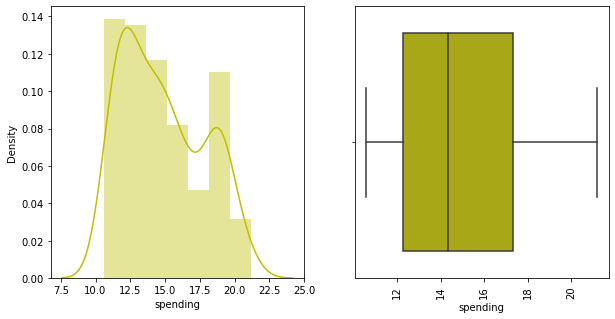

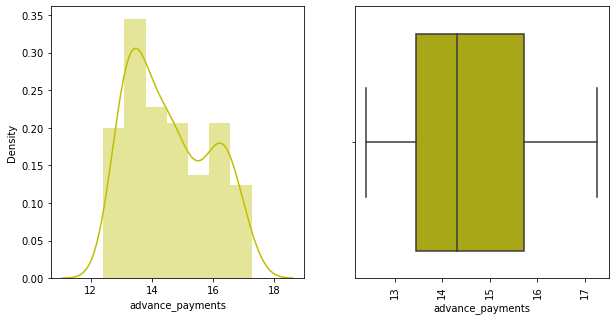

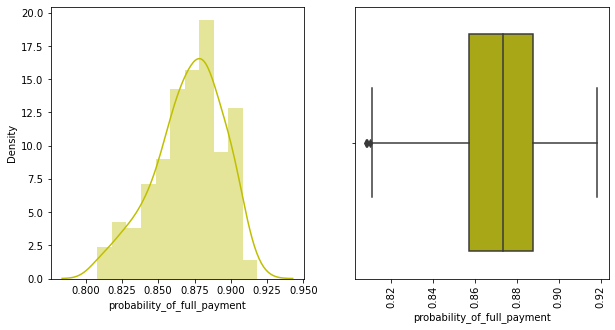

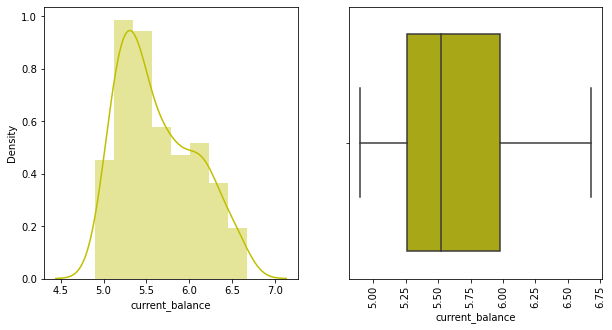

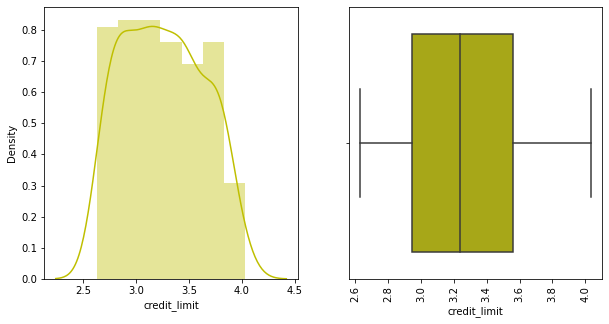

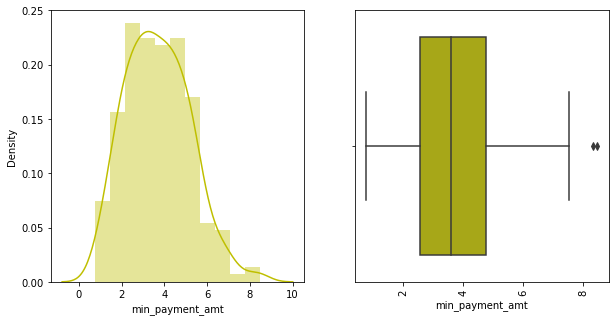

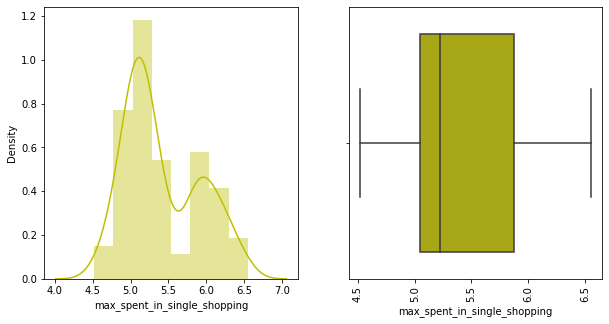

In [10]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

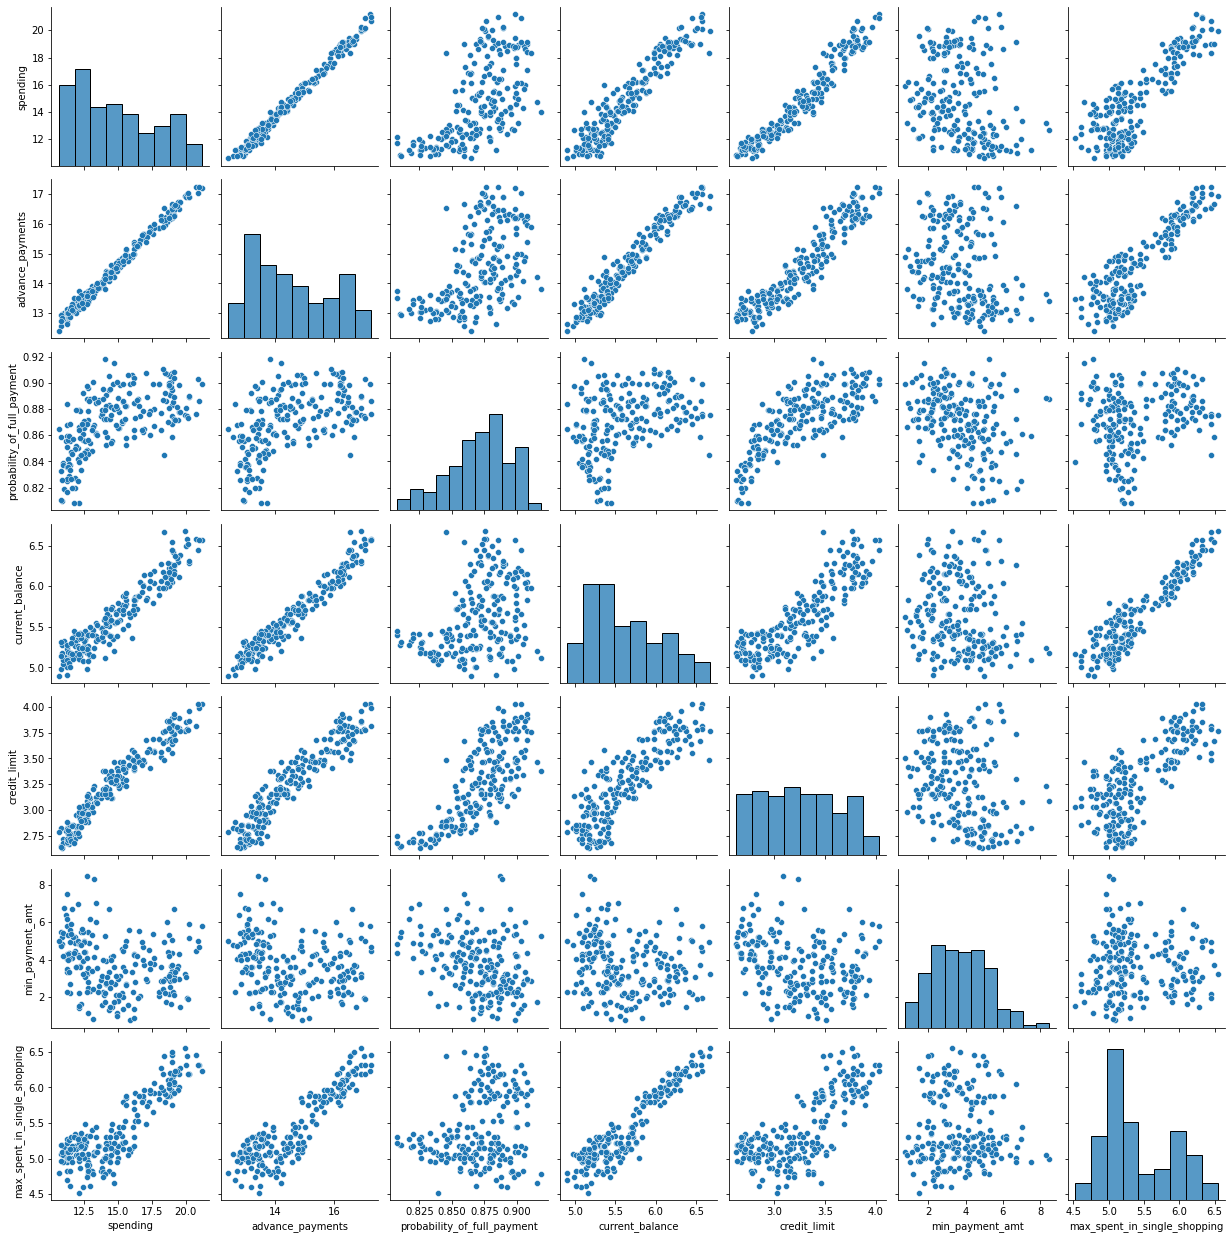

In [11]:
sns.pairplot(data_df)
plt.show()    

In [12]:
corr = data_df.corr(method='pearson')
corr

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


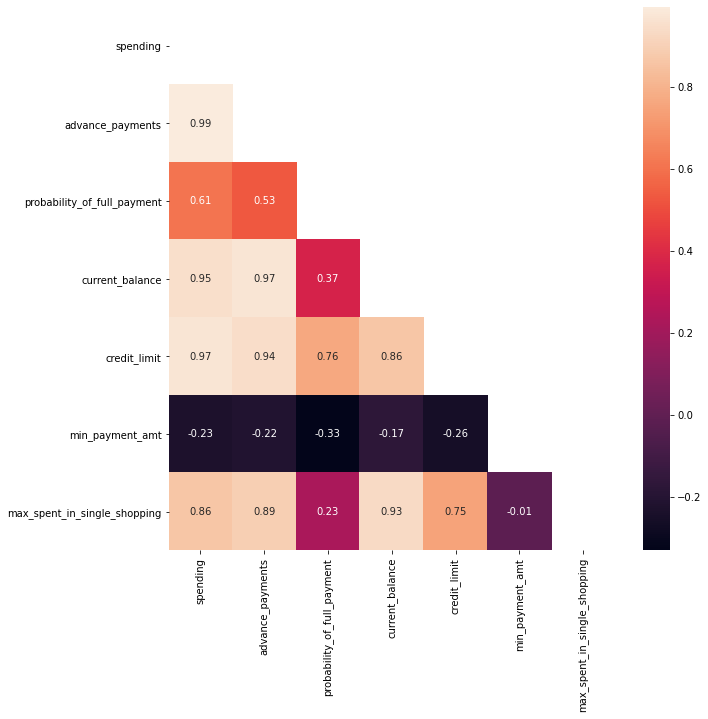

In [13]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(10, 10))
sns.heatmap(data_df.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

### 1.2	Do you think scaling is necessary for clustering in this case? Justify

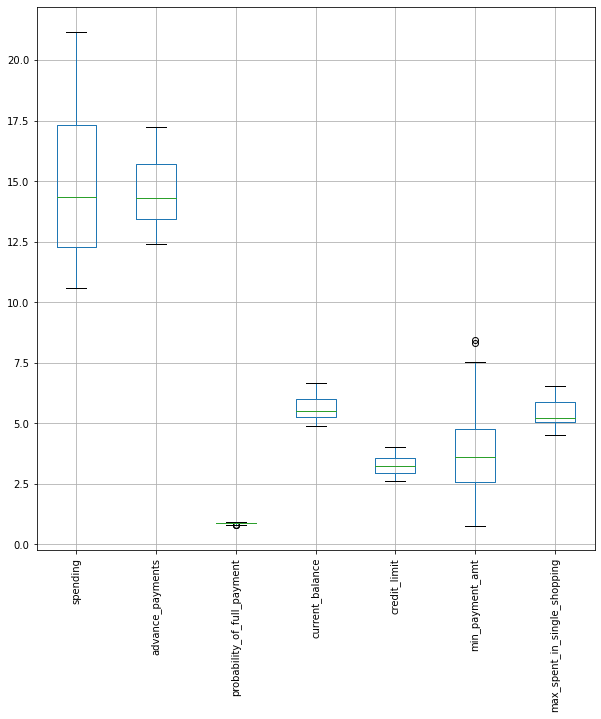

In [14]:
data_df.boxplot(figsize=(10,10))
plt.xticks(rotation=90)
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
X = StandardScaler()

In [17]:
scaled_df = pd.DataFrame(X.fit_transform(data_df),columns=data_df.columns)

In [18]:
scaled_df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,9.148766e-16,1.097006e-16,1.243978e-15,-1.089076e-16,-2.994298e-16,5.302637e-16,-1.935489e-15
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00
min,-1.466714e+00,-1.649686e+00,-2.668236e+00,-1.650501e+00,-1.668209e+00,-1.956769e+00,-1.813288e+00
25%,-8.879552e-01,-8.514330e-01,-5.980791e-01,-8.286816e-01,-8.349072e-01,-7.591477e-01,-7.404953e-01
50%,-1.696741e-01,-1.836639e-01,1.039927e-01,-2.376280e-01,-5.733534e-02,-6.746852e-02,-3.774588e-01
75%,8.465989e-01,8.870693e-01,7.116771e-01,7.945947e-01,8.044956e-01,7.123789e-01,9.563941e-01
max,2.181534e+00,2.065260e+00,2.006586e+00,2.367533e+00,2.055112e+00,3.170590e+00,2.328998e+00


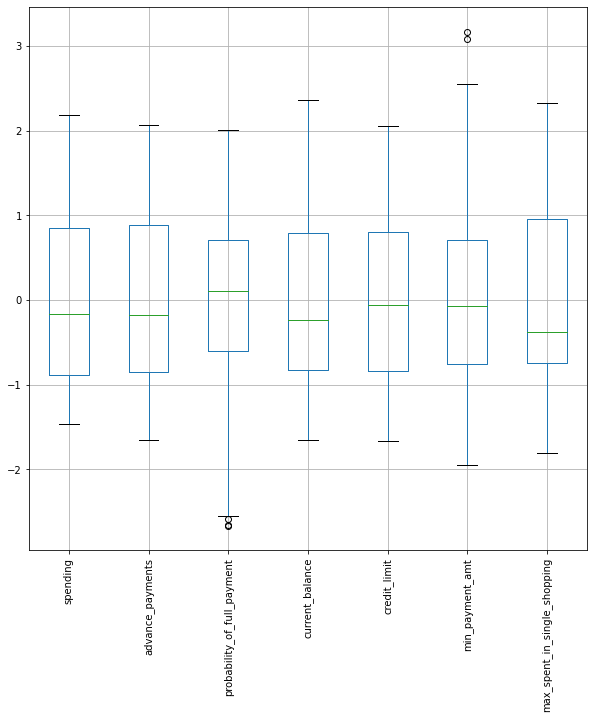

In [19]:
scaled_df.boxplot(figsize=(10,10))
plt.xticks(rotation=90)
plt.show()

### 1.3	Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [21]:
wardlink = linkage(scaled_df, method = 'ward')

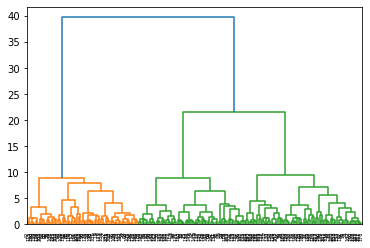

In [22]:
dend = dendrogram(wardlink)

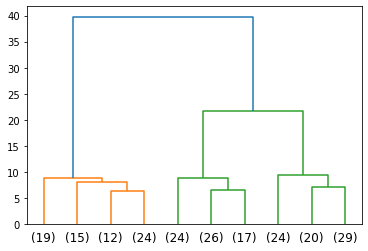

In [23]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [24]:
from scipy.cluster.hierarchy import fcluster

In [25]:
#Method 1

clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [26]:
# Method 2

clusters1 = fcluster(wardlink, 20, criterion='distance')
clusters1

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [27]:
data_df['clusters'] = clusters

In [28]:
data_df

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1
...,...,...,...,...,...,...,...,...
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738,3
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795,1
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,3
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443,1


In [29]:
data_df.clusters.value_counts().sort_index()

1    70
2    67
3    73
Name: clusters, dtype: int64

In [30]:
data_df.to_csv('Cluster_1.csv')

### 1.4	Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [31]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)


KMeans(n_clusters=3, random_state=1)

In [32]:
k_means.inertia_

430.65897315130064

In [33]:
k_means.labels_

array([2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0])

In [34]:
wss =[] 

In [35]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [36]:
wss

[1469.9999999999995,
 659.1717544870411,
 430.65897315130064,
 371.6531439995162,
 326.5136953844313,
 289.4449389962108,
 262.37539659311113,
 239.24411242874328,
 222.5044435062064,
 204.78566878850486]

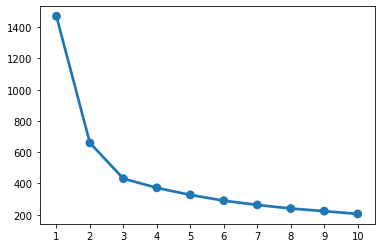

In [37]:
a=[1,2,3,4,5,6,7,8,9,10]
sns.pointplot(a, wss)

In [38]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_
k_means.inertia_

430.65897315130064

In [39]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [40]:
silhouette_score(scaled_df,labels,random_state=1)

0.40072705527512986

In [41]:
sil_width = silhouette_samples(scaled_df,labels)

In [42]:
data_df["sil_width"] = sil_width
data_df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0.362276


In [43]:
silhouette_samples(scaled_df,labels).min()

0.002713089347678376

In [44]:
data_df.to_csv('K-means.csv')

### 1.5	Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [45]:
data_df['Cluster_Kmeans']=labels

In [46]:
data_df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,sil_width,Cluster_Kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0.573699,2
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0.366386,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0.637784,2
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0.512458,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0.362276,2


In [47]:
data_df.Cluster_Kmeans.value_counts().sort_index()

0    71
1    72
2    67
Name: Cluster_Kmeans, dtype: int64

In [48]:
profile = data_df
profile = profile.groupby('Cluster_Kmeans').mean()
profile['Frequency']=data_df.Cluster_Kmeans.value_counts().sort_index()

In [49]:
profile.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,sil_width,Frequency
Cluster_Kmeans,,,,,,,,,,
0,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,2.873239,0.339816,71
1,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,2.083333,0.397473,72
2,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,1.029851,0.468772,67


## 2	Problem Statement: 2
## An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.


In [50]:
firm_df = credit_df = pd.read_csv("insurance_part2_data-2.csv")

In [51]:
firm_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [52]:
firm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [53]:
firm_df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [54]:
firm_df.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [55]:
dups2 = firm_df.duplicated()
print('Number of duplicate rows = %d' % (dups2.sum()))

firm_df[dups2]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [56]:
firm_df.drop_duplicates(inplace=True)
dups = firm_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(firm_df.shape)

Number of duplicate rows = 0
(2861, 10)


In [57]:
def univariateAnalysis_category(cat_column):
    fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
   
    sns.distplot(firm_df[cat_column], color='y',ax=axs[0]);
    sns.boxplot(firm_df[cat_column], color='y',ax=axs[1])
    plt.xticks(rotation=90)
    plt.show()

In [58]:
df_int2 = firm_df.select_dtypes(include = ['int64','float64'])
lstcatcolumns2 = list(df_int2.columns.values)

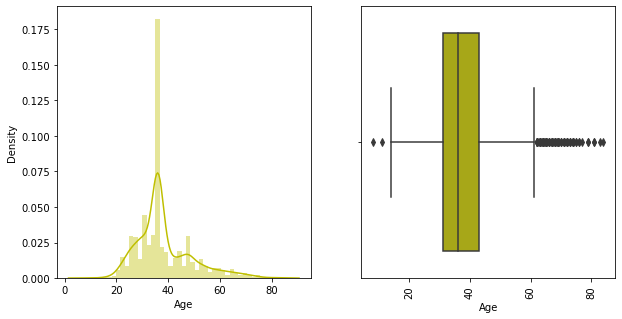

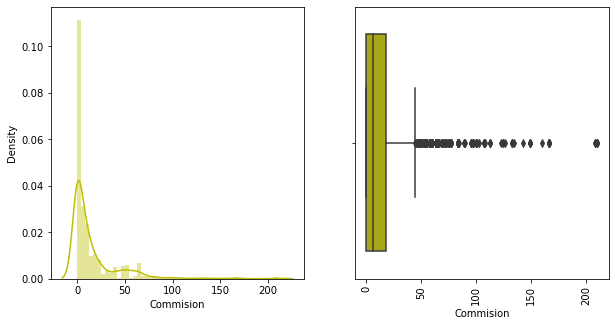

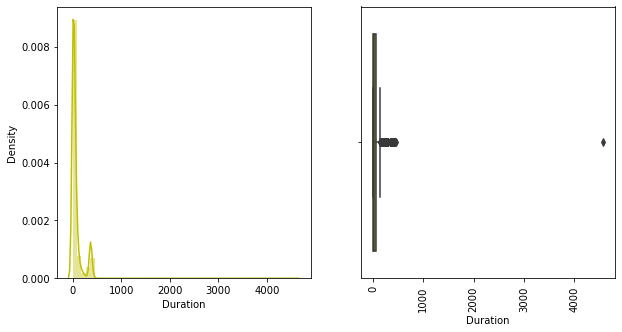

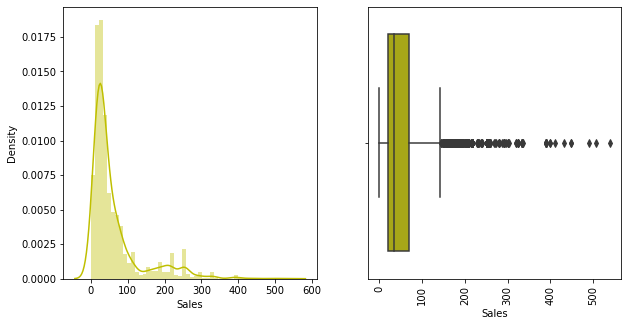

In [59]:
for x in lstcatcolumns2:
    univariateAnalysis_category(x)

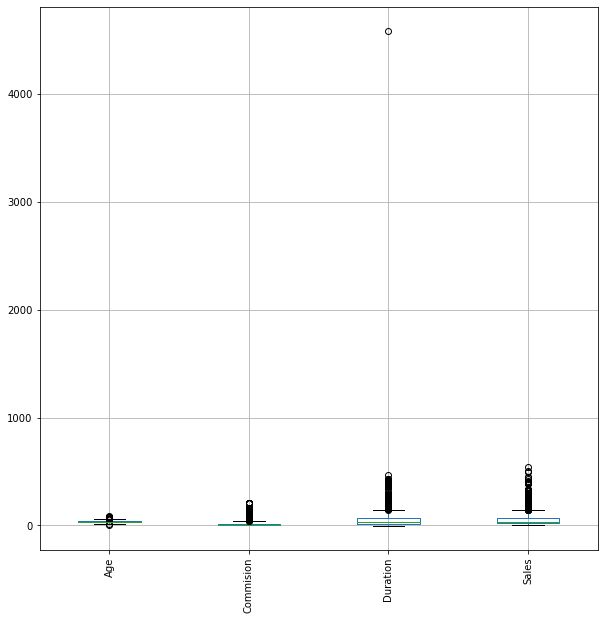

In [60]:
firm_df.boxplot(figsize=(10,10))
plt.xticks(rotation=90)
plt.show()

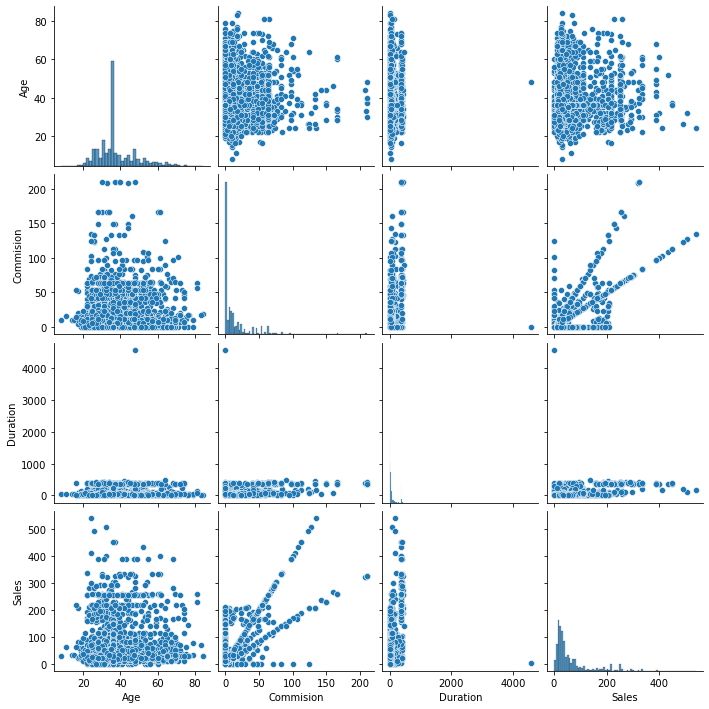

In [61]:
sns.pairplot(df_int2)
plt.show()    

In [62]:
corr = df_int2.corr(method='pearson')
corr

,Age,Commision,Duration,Sales
Age,1.000000,0.064759,0.027457,0.036187
Commision,0.064759,1.000000,0.462114,0.762181
Duration,0.027457,0.462114,1.000000,0.549889
Sales,0.036187,0.762181,0.549889,1.000000


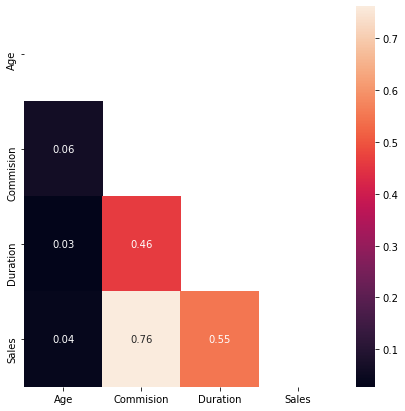

In [63]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(7, 7))
sns.heatmap(df_int2.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

In [64]:
for feature in firm_df.columns: 
    if firm_df[feature].dtype == 'object': 
        firm_df[feature] = pd.Categorical(firm_df[feature]).codes

In [65]:
firm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 128.5 KB


In [66]:
firm_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [67]:
df_dm = firm_df.copy()

In [68]:
x = df_dm.drop("Claimed" , axis=1)
y = df_dm.pop("Claimed")

In [69]:
X_train, X_test, train_labels, test_labels = train_test_split(x, y, test_size=.30, random_state=1)

In [70]:
X_train

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
1300,69,0,0,6.00,1,7,15.0,0,0
2332,36,2,1,0.00,1,29,35.0,2,0
900,60,1,1,41.58,1,8,69.3,2,1
207,36,0,0,9.75,1,70,39.0,4,0
2310,36,2,1,0.00,1,39,51.0,1,2
...,...,...,...,...,...,...,...,...,...
2894,27,2,1,0.00,1,19,20.0,2,0
929,36,2,1,0.00,1,30,42.0,2,0
1132,36,2,1,0.00,1,15,13.0,1,0
236,36,2,1,0.00,1,9,112.0,2,0


In [71]:
X_test

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
642,31,1,1,0.00,0,402,97.0,2,0
219,68,2,1,0.00,1,60,29.0,1,0
1685,42,0,0,21.00,1,11,84.0,4,0
962,44,1,1,23.76,1,51,39.6,2,0
800,50,1,1,35.64,1,111,59.4,2,0
...,...,...,...,...,...,...,...,...,...
2948,19,1,1,10.50,0,32,30.0,2,0
2203,45,2,1,0.00,1,37,22.0,2,0
445,51,0,0,4.00,1,5,16.0,0,0
2964,53,2,1,0.00,1,13,21.0,2,0


In [72]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2002, 9)
X_test (859, 9)
train_labels (2002,)
test_labels (859,)


### CART

In [73]:
dt_model = DecisionTreeClassifier(criterion = 'gini' , random_state=1 )

In [74]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(random_state=1)

In [75]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('firm_cart.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()

In [76]:
ytrain_predict = dt_model.predict(X_train)
ytest_predict = dt_model.predict(X_test)

In [77]:
from sklearn.model_selection import GridSearchCV

param_grid_dtcl = {
'criterion': ['gini'],
'max_depth': [10],
'min_samples_leaf': [50],
'min_samples_split': [450],
}


dt_model = DecisionTreeClassifier(criterion = 'gini' , random_state=1 )
grid_search_dtcl = GridSearchCV(estimator = dt_model, param_grid = param_grid_dtcl, cv = 10)

In [78]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=450,
                       random_state=1)

In [79]:
print (pd.DataFrame(best_grid_dtcl.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Age           0.000000
Agency_Code   0.619073
Type          0.000000
Commision     0.015189
Channel       0.000000
Duration      0.002489
Sales         0.314424
Product Name  0.048825
Destination   0.000000


In [80]:
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('firm_cart_final.dot','w')
dot_data = tree.export_graphviz(best_grid_dtcl, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()

In [81]:
ytrain_predict = best_grid_dtcl.predict(X_train)
ytest_predict = best_grid_dtcl.predict(X_test)

In [82]:
import matplotlib.pyplot as plt

AUC: 0.796


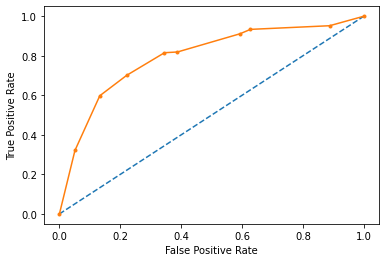

In [83]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid_dtcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# show the plot
plt.show()

AUC: 0.803


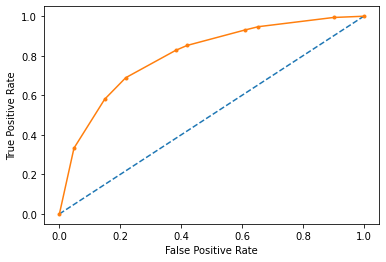

In [84]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid_dtcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# show the plot
plt.show()

In [85]:
from sklearn.metrics import classification_report,confusion_matrix

In [86]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       588
           1       0.68      0.60      0.63       271

    accuracy                           0.78       859
   macro avg       0.75      0.73      0.74       859
weighted avg       0.78      0.78      0.78       859



In [87]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1359
           1       0.65      0.58      0.61       643

    accuracy                           0.76      2002
   macro avg       0.73      0.72      0.72      2002
weighted avg       0.76      0.76      0.76      2002



In [88]:
confusion_matrix(train_labels, ytrain_predict)

array([[1157,  202],
       [ 270,  373]], dtype=int64)

In [89]:
confusion_matrix(test_labels, ytest_predict)

array([[510,  78],
       [109, 162]], dtype=int64)

In [90]:
best_grid_dtcl.score(X_train,train_labels)

0.7642357642357642

In [91]:
best_grid_dtcl.score(X_test,test_labels)

0.7823050058207218

### Random Forest

In [92]:
rfcl = RandomForestClassifier(n_estimators = 501)
rfcl = rfcl.fit(X_train, train_labels)

In [93]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5,10,15],
    'max_features': [4, 5,6,7],
    'min_samples_leaf': [10,50, 70],
    'min_samples_split': [30, 50,70,450],
    'n_estimators': [150]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [94]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [5, 10, 15], 'max_features': [4, 5, 6, 7],
                         'min_samples_leaf': [10, 50, 70],
                         'min_samples_split': [30, 50, 70, 450],
                         'n_estimators': [150]})

In [95]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestClassifier(max_depth=10, max_features=4, min_samples_leaf=10,
                       min_samples_split=30, n_estimators=150, random_state=1)

In [96]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [97]:
from sklearn.metrics import confusion_matrix,classification_report

In [98]:
confusion_matrix(train_labels,ytrain_predict)

array([[1229,  130],
       [ 258,  385]], dtype=int64)

In [99]:
confusion_matrix(test_labels,ytest_predict)

array([[525,  63],
       [119, 152]], dtype=int64)

In [100]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       588
           1       0.71      0.56      0.63       271

    accuracy                           0.79       859
   macro avg       0.76      0.73      0.74       859
weighted avg       0.78      0.79      0.78       859



In [101]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1359
           1       0.75      0.60      0.66       643

    accuracy                           0.81      2002
   macro avg       0.79      0.75      0.76      2002
weighted avg       0.80      0.81      0.80      2002



In [102]:
# Variable Importance
print (pd.DataFrame(best_grid.feature_importances_,
columns = ["Imp"],
index = X_train.columns).sort_values('Imp',ascending=False
))


                   Imp
Agency_Code   0.252259
Sales         0.207481
Product Name  0.179632
Commision     0.126912
Duration      0.112591
Age           0.076571
Type          0.027728
Destination   0.015568
Channel       0.001257


AUC: 0.818


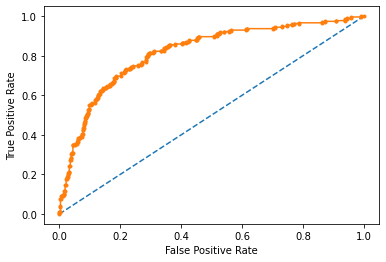

In [103]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# show the plot
plt.show()

AUC: 0.871


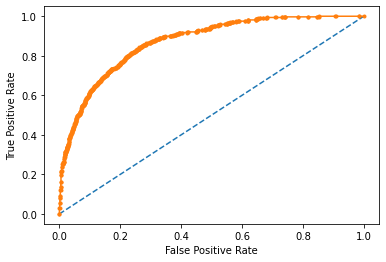

In [104]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# show the plot
plt.show()

### ANN


In [105]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.30, random_state=1)

In [106]:
sc = StandardScaler()

In [107]:
x_train = sc.fit_transform(x_train)

In [108]:
x_train

array([[ 2.88764239, -1.2626112 , -1.19813318, ..., -0.65375471,
        -1.31338076, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ..., -0.37032806,
         0.24339146, -0.44775345],
       [ 2.04101412, -0.27289013,  0.83463176, ...,  0.11574864,
         0.24339146,  1.24676906],
       ...,
       [-0.21666128,  0.71683095,  0.83463176, ..., -0.68209737,
        -0.53499465, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ...,  0.72086453,
         0.24339146, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ...,  0.72086453,
         0.24339146,  1.24676906]])

In [109]:
x_test = sc.transform(x_test)

In [110]:
x_test

array([[-0.68701032, -0.27289013,  0.83463176, ...,  0.50829455,
         0.24339146, -0.44775345],
       [ 2.79357258,  0.71683095,  0.83463176, ..., -0.45535606,
        -0.53499465, -0.44775345],
       [ 0.34775757, -1.2626112 , -1.19813318, ...,  0.32406723,
         1.80016368, -0.44775345],
       ...,
       [ 1.19438584, -1.2626112 , -1.19813318, ..., -0.63958338,
        -1.31338076, -0.44775345],
       [ 1.38252546,  0.71683095,  0.83463176, ..., -0.56872671,
         0.24339146, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ..., -0.56872671,
         0.24339146, -0.44775345]])

In [111]:
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=1,tol=0.01)

In [112]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

Iteration 1, loss = 0.72896179
Iteration 2, loss = 0.70593218
Iteration 3, loss = 0.67784453
Iteration 4, loss = 0.65545352
Iteration 5, loss = 0.63764756
Iteration 6, loss = 0.62198249
Iteration 7, loss = 0.60700593
Iteration 8, loss = 0.59453642
Iteration 9, loss = 0.58487686
Iteration 10, loss = 0.57820536
Iteration 11, loss = 0.57181190
Iteration 12, loss = 0.56566198
Iteration 13, loss = 0.56039489
Iteration 14, loss = 0.55590465
Iteration 15, loss = 0.55265118
Iteration 16, loss = 0.54951657
Iteration 17, loss = 0.54664611
Iteration 18, loss = 0.54380193
Iteration 19, loss = 0.54086463
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


In [113]:
from sklearn.metrics import confusion_matrix,classification_report

In [114]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[553,  35],
       [181,  90]], dtype=int64)

In [115]:
pred2 = clf.predict(x_train)
confusion_matrix(y_train,pred2)

array([[1279,   80],
       [ 445,  198]], dtype=int64)

In [116]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.94      0.84       588
           1       0.72      0.33      0.45       271

    accuracy                           0.75       859
   macro avg       0.74      0.64      0.65       859
weighted avg       0.74      0.75      0.72       859



In [117]:
print(classification_report(y_train, pred2))

              precision    recall  f1-score   support

           0       0.74      0.94      0.83      1359
           1       0.71      0.31      0.43       643

    accuracy                           0.74      2002
   macro avg       0.73      0.62      0.63      2002
weighted avg       0.73      0.74      0.70      2002



In [118]:
import matplotlib.pyplot as plt

AUC: 0.780


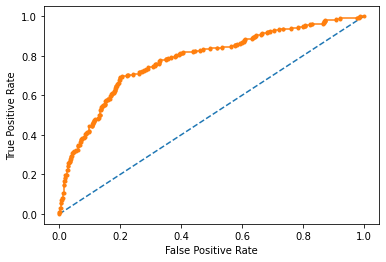

In [119]:
# AUC and ROC for the test data

# predict probabilities
probs = clf.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# show the plot
plt.show()

AUC: 0.768


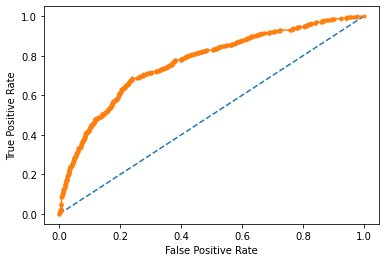

In [120]:
# AUC and ROC for the training data

# predict probabilities
probs = clf.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# show the plot
plt.show()